In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [68]:
df = pd.read_csv('../bagging/car_sensors.csv')
df.head()

,safe,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,S13,S14,S15,S16,S17,S18,S19,S20,S21,S22
0,1,36.2247,10.77330,0.243897,596,100.6710,0.0,0.0,1,28,...,1,57,0.0,0.280,240,5.99375,0,0.0,4,14.9382
1,1,35.7343,17.45510,0.243897,600,100.0000,0.0,0.0,1,14,...,1,57,0.0,0.175,240,5.99375,0,0.0,4,14.8827
2,1,31.6561,7.61366,0.308763,604,99.3377,0.0,0.0,1,4,...,1,58,0.0,0.280,240,5.99375,0,0.0,4,14.6005
3,1,33.8320,13.11190,0.293195,616,97.4026,0.0,0.0,1,8,...,1,58,0.0,0.385,240,4.50625,0,13.0,4,14.6782
4,1,42.5138,13.99850,0.259465,632,94.9367,0.0,0.0,1,8,...,1,57,0.0,0.070,240,5.99375,0,19.5,4,15.3461


In [69]:
df.columns

Index(['safe', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10',
       'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20',
       'S21', 'S22'],
      dtype='object')

In [70]:
df.shape

(33239, 23)

In [71]:
df['weights'] = 1 / df.shape[0] # initial weights of each sample



In [72]:
df.head(6)

,safe,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,S14,S15,S16,S17,S18,S19,S20,S21,S22,weights
0,1,36.2247,10.77330,0.243897,596,100.6710,0.0,0.0,1,28,...,57,0.0,0.280,240,5.99375,0,0.0,4,14.9382,0.00003
1,1,35.7343,17.45510,0.243897,600,100.0000,0.0,0.0,1,14,...,57,0.0,0.175,240,5.99375,0,0.0,4,14.8827,0.00003
2,1,31.6561,7.61366,0.308763,604,99.3377,0.0,0.0,1,4,...,58,0.0,0.280,240,5.99375,0,0.0,4,14.6005,0.00003
3,1,33.8320,13.11190,0.293195,616,97.4026,0.0,0.0,1,8,...,58,0.0,0.385,240,4.50625,0,13.0,4,14.6782,0.00003
4,1,42.5138,13.99850,0.259465,632,94.9367,0.0,0.0,1,8,...,57,0.0,0.070,240,5.99375,0,19.5,4,15.3461,0.00003
5,1,36.1261,14.85930,0.278925,600,100.0000,0.0,0.0,1,4,...,58,0.0,0.175,1008,4.50625,0,23.9,4,15.0559,0.00003


In [73]:
X = df.drop('safe', axis=1)
y = df['safe']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# train a weak classifier
dt1 = DecisionTreeClassifier(max_depth=1, random_state=42)
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1, random_state=42)

[Text(0.5, 0.75, 'x[12] <= 0.5\ngini = 0.489\nsamples = 33239\nvalue = [14100, 19139]'),
 Text(0.25, 0.25, 'gini = 0.141\nsamples = 4035\nvalue = [3728, 307]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.458\nsamples = 29204\nvalue = [10372, 18832]'),
 Text(0.625, 0.5, '  False')]

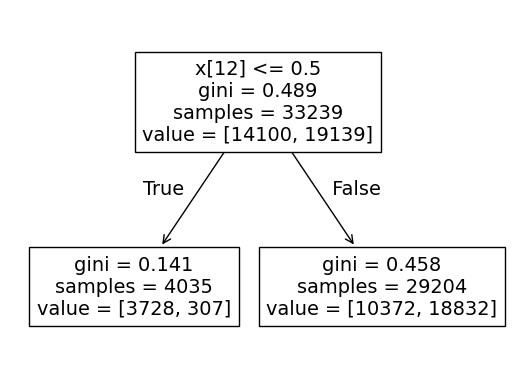

In [75]:
from sklearn.tree import plot_tree

plot_tree(dt1)

In [76]:
df['y_pred'] = dt1.predict(X)
df.head()

,safe,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,S15,S16,S17,S18,S19,S20,S21,S22,weights,y_pred
0,1,36.2247,10.77330,0.243897,596,100.6710,0.0,0.0,1,28,...,0.0,0.280,240,5.99375,0,0.0,4,14.9382,0.00003,1
1,1,35.7343,17.45510,0.243897,600,100.0000,0.0,0.0,1,14,...,0.0,0.175,240,5.99375,0,0.0,4,14.8827,0.00003,1
2,1,31.6561,7.61366,0.308763,604,99.3377,0.0,0.0,1,4,...,0.0,0.280,240,5.99375,0,0.0,4,14.6005,0.00003,1
3,1,33.8320,13.11190,0.293195,616,97.4026,0.0,0.0,1,8,...,0.0,0.385,240,4.50625,0,13.0,4,14.6782,0.00003,1
4,1,42.5138,13.99850,0.259465,632,94.9367,0.0,0.0,1,8,...,0.0,0.070,240,5.99375,0,19.5,4,15.3461,0.00003,1


In [77]:
error_factor = np.where(df['y_pred'] != df['safe'], df['weights'], 0)
e_m = error_factor.sum() / df['weights'].sum()

accuracy_factor = np.log((1 - e_m) / e_m)

In [78]:
#update weights
def update_weights(df, accuracy_factor):
    if df['safe'] == df['y_pred']:
        return df['weights'] * np.exp(-accuracy_factor)
    else:
        return df['weights'] * np.exp(accuracy_factor)

In [79]:
df['weights'] = df.apply(lambda row: update_weights(row, accuracy_factor), axis=1)

df['weights'] = df['weights'] / df['weights'].sum()

In [80]:
df.head()

,safe,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,S15,S16,S17,S18,S19,S20,S21,S22,weights,y_pred
0,1,36.2247,10.77330,0.243897,596,100.6710,0.0,0.0,1,28,...,0.0,0.280,240,5.99375,0,0.0,4,14.9382,0.000014,1
1,1,35.7343,17.45510,0.243897,600,100.0000,0.0,0.0,1,14,...,0.0,0.175,240,5.99375,0,0.0,4,14.8827,0.000014,1
2,1,31.6561,7.61366,0.308763,604,99.3377,0.0,0.0,1,4,...,0.0,0.280,240,5.99375,0,0.0,4,14.6005,0.000014,1
3,1,33.8320,13.11190,0.293195,616,97.4026,0.0,0.0,1,8,...,0.0,0.385,240,4.50625,0,13.0,4,14.6782,0.000014,1
4,1,42.5138,13.99850,0.259465,632,94.9367,0.0,0.0,1,8,...,0.0,0.070,240,5.99375,0,19.5,4,15.3461,0.000014,1


In [81]:
df['weights'].sum()

1.0

In [82]:
df.head()

,safe,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,S15,S16,S17,S18,S19,S20,S21,S22,weights,y_pred
0,1,36.2247,10.77330,0.243897,596,100.6710,0.0,0.0,1,28,...,0.0,0.280,240,5.99375,0,0.0,4,14.9382,0.000014,1
1,1,35.7343,17.45510,0.243897,600,100.0000,0.0,0.0,1,14,...,0.0,0.175,240,5.99375,0,0.0,4,14.8827,0.000014,1
2,1,31.6561,7.61366,0.308763,604,99.3377,0.0,0.0,1,4,...,0.0,0.280,240,5.99375,0,0.0,4,14.6005,0.000014,1
3,1,33.8320,13.11190,0.293195,616,97.4026,0.0,0.0,1,8,...,0.0,0.385,240,4.50625,0,13.0,4,14.6782,0.000014,1
4,1,42.5138,13.99850,0.259465,632,94.9367,0.0,0.0,1,8,...,0.0,0.070,240,5.99375,0,19.5,4,15.3461,0.000014,1


In [83]:
df['weights'].sum()

1.0

In [84]:
# know all mis calssified points
misclassified_points = df[df['y_pred'] != df['safe']]
print("Misclassified Points:")
print(misclassified_points.shape)

Misclassified Points:
(10679, 25)


In [85]:
# preparing data for next weak classifier

second_df = df.drop(columns=['y_pred'])
second_df.head()
X = second_df.drop('safe', axis=1)
y = second_df['safe']



In [86]:
# train a second weak classifier
dt2 = DecisionTreeClassifier(max_depth=1, random_state=42)
dt2.fit(X, y)

DecisionTreeClassifier(max_depth=1, random_state=42)

[Text(0.5, 0.75, 'x[12] <= 0.5\ngini = 0.489\nsamples = 33239\nvalue = [14100, 19139]'),
 Text(0.25, 0.25, 'gini = 0.141\nsamples = 4035\nvalue = [3728, 307]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.458\nsamples = 29204\nvalue = [10372, 18832]'),
 Text(0.625, 0.5, '  False')]

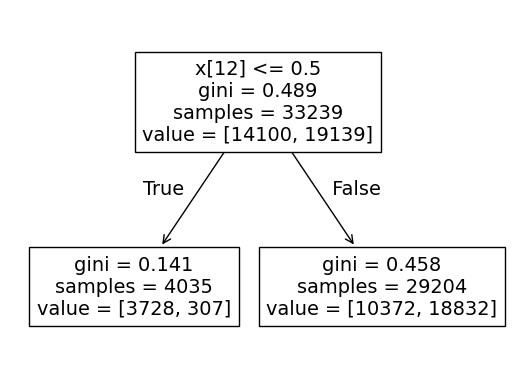

In [87]:
from sklearn.tree import plot_tree

plot_tree(dt1)

In [88]:
second_df['y_pred'] = dt2.predict(X)
second_df.head()

,safe,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,S15,S16,S17,S18,S19,S20,S21,S22,weights,y_pred
0,1,36.2247,10.77330,0.243897,596,100.6710,0.0,0.0,1,28,...,0.0,0.280,240,5.99375,0,0.0,4,14.9382,0.000014,1
1,1,35.7343,17.45510,0.243897,600,100.0000,0.0,0.0,1,14,...,0.0,0.175,240,5.99375,0,0.0,4,14.8827,0.000014,1
2,1,31.6561,7.61366,0.308763,604,99.3377,0.0,0.0,1,4,...,0.0,0.280,240,5.99375,0,0.0,4,14.6005,0.000014,1
3,1,33.8320,13.11190,0.293195,616,97.4026,0.0,0.0,1,8,...,0.0,0.385,240,4.50625,0,13.0,4,14.6782,0.000014,1
4,1,42.5138,13.99850,0.259465,632,94.9367,0.0,0.0,1,8,...,0.0,0.070,240,5.99375,0,19.5,4,15.3461,0.000014,1


In [89]:
error_factor_m2 =  np.where(second_df['y_pred'] != second_df['safe'], second_df['weights'], 0)
em2 = error_factor_m2.sum() / second_df['weights'].sum()

accuracy_factor_m2 = np.log((1 - em2) / em2)

In [90]:
second_df['weights'] = second_df.apply(lambda row: update_weights(row, accuracy_factor_m2), axis=1)

second_df['weights'] = second_df['weights'] / second_df['weights'].sum()

In [91]:
second_df.head()

,safe,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,S15,S16,S17,S18,S19,S20,S21,S22,weights,y_pred
0,1,36.2247,10.77330,0.243897,596,100.6710,0.0,0.0,1,28,...,0.0,0.280,240,5.99375,0,0.0,4,14.9382,0.000001,1
1,1,35.7343,17.45510,0.243897,600,100.0000,0.0,0.0,1,14,...,0.0,0.175,240,5.99375,0,0.0,4,14.8827,0.000001,1
2,1,31.6561,7.61366,0.308763,604,99.3377,0.0,0.0,1,4,...,0.0,0.280,240,5.99375,0,0.0,4,14.6005,0.000001,1
3,1,33.8320,13.11190,0.293195,616,97.4026,0.0,0.0,1,8,...,0.0,0.385,240,4.50625,0,13.0,4,14.6782,0.000001,1
4,1,42.5138,13.99850,0.259465,632,94.9367,0.0,0.0,1,8,...,0.0,0.070,240,5.99375,0,19.5,4,15.3461,0.000001,1


In [92]:
second_df['weights'].sum()

1.0

In [93]:
# know all mis calssified points
misclassified_points_model2 = second_df[second_df['y_pred'] != second_df['safe']]
print("Misclassified Points by mode 2 :")
print(misclassified_points.shape)

Misclassified Points by mode 2 :
(10679, 25)


In [94]:
third_df = second_df.drop(columns=['y_pred'])

X = third_df.drop('safe', axis=1)
y = third_df['safe']

In [95]:
print(accuracy_factor,accuracy_factor_m2)

0.74789923044045 2.5473800483552878


In [96]:
print(e_m,em2)

0.3212792201931466 0.07260269333490872


In [97]:
# training a third weak classifier

dt3 = DecisionTreeClassifier(max_depth=1, random_state=42)
dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1, random_state=42)

[Text(0.5, 0.75, 'x[22] <= 0.0\ngini = 0.489\nsamples = 33239\nvalue = [14100, 19139]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 18832\nvalue = [0, 18832]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.042\nsamples = 14407\nvalue = [14100, 307]'),
 Text(0.625, 0.5, '  False')]

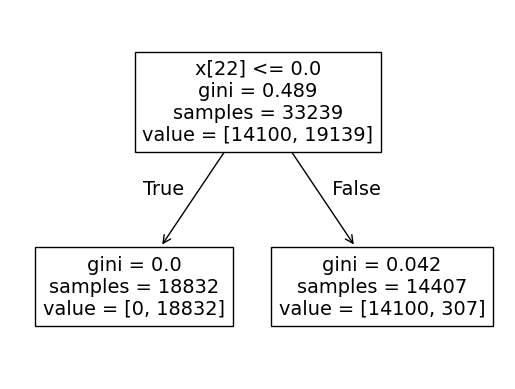

In [98]:
plot_tree(dt3)

In [99]:
third_df['y_pred'] = dt3.predict(X)
third_df.head()

,safe,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,S15,S16,S17,S18,S19,S20,S21,S22,weights,y_pred
0,1,36.2247,10.77330,0.243897,596,100.6710,0.0,0.0,1,28,...,0.0,0.280,240,5.99375,0,0.0,4,14.9382,0.000001,1
1,1,35.7343,17.45510,0.243897,600,100.0000,0.0,0.0,1,14,...,0.0,0.175,240,5.99375,0,0.0,4,14.8827,0.000001,1
2,1,31.6561,7.61366,0.308763,604,99.3377,0.0,0.0,1,4,...,0.0,0.280,240,5.99375,0,0.0,4,14.6005,0.000001,1
3,1,33.8320,13.11190,0.293195,616,97.4026,0.0,0.0,1,8,...,0.0,0.385,240,4.50625,0,13.0,4,14.6782,0.000001,1
4,1,42.5138,13.99850,0.259465,632,94.9367,0.0,0.0,1,8,...,0.0,0.070,240,5.99375,0,19.5,4,15.3461,0.000001,1


In [100]:
error_factor3 = np.where(third_df['y_pred'] != third_df['safe'], third_df['weights'], 0)
e_m3 = error_factor.sum() / third_df['weights'].sum()

accuracy_factor3 = np.log((1 - e_m3) / e_m3)

In [101]:
print('error_factor', e_m3)
print("accuracy_factor", accuracy_factor3)

error_factor 0.32127922019314653
accuracy_factor 0.7478992304404504


In [102]:
# know all mis calssified points
misclassified_points = third_df[third_df['y_pred'] != third_df['safe']]
print("Misclassified Points by model 3 :")
print(misclassified_points.shape)

Misclassified Points by model 3 :
(307, 25)


In [103]:
third_df['weights'] = third_df.apply(lambda row: update_weights(row, accuracy_factor3), axis=1)

third_df['weights'] = third_df['weights'] / third_df['weights'].sum()

In [104]:
third_df['weights'].sum()

1.0

In [105]:
third_df.head()

,safe,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,S15,S16,S17,S18,S19,S20,S21,S22,weights,y_pred
0,1,36.2247,10.77330,0.243897,596,100.6710,0.0,0.0,1,28,...,0.0,0.280,240,5.99375,0,0.0,4,14.9382,5.984097e-07,1
1,1,35.7343,17.45510,0.243897,600,100.0000,0.0,0.0,1,14,...,0.0,0.175,240,5.99375,0,0.0,4,14.8827,5.984097e-07,1
2,1,31.6561,7.61366,0.308763,604,99.3377,0.0,0.0,1,4,...,0.0,0.280,240,5.99375,0,0.0,4,14.6005,5.984097e-07,1
3,1,33.8320,13.11190,0.293195,616,97.4026,0.0,0.0,1,8,...,0.0,0.385,240,4.50625,0,13.0,4,14.6782,5.984097e-07,1
4,1,42.5138,13.99850,0.259465,632,94.9367,0.0,0.0,1,8,...,0.0,0.070,240,5.99375,0,19.5,4,15.3461,5.984097e-07,1


In [ ]:
# so final prediction is basically array for all the records its the heart of ada boosting algorithm

df['safe'] = df['safe'].replace({0: -1, 1: 1})
df['y_pred'] = df['y_pred'].replace({0: -1, 1: 1})
second_df['y_pred'] = second_df['y_pred'].replace({0: -1, 1: 1})
third_df['y_pred'] = third_df['y_pred'].replace({0: -1, 1: 1})

final_prediction = np.sign(
    accuracy_factor * df['y_pred'] +
    accuracy_factor_m2 * second_df['y_pred'] +
    accuracy_factor3 * third_df['y_pred']
)


In [109]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# y_true should also be in -1 and +1
accuracy = accuracy_score(df['safe'], final_prediction)
print("Accuracy:", accuracy)
print(confusion_matrix(df['safe'], final_prediction))
print(classification_report(df['safe'], final_prediction))


Accuracy: 0.8786064562712477
[[10372  3728]
 [  307 18832]]
              precision    recall  f1-score   support

          -1       0.97      0.74      0.84     14100
           1       0.83      0.98      0.90     19139

    accuracy                           0.88     33239
   macro avg       0.90      0.86      0.87     33239
weighted avg       0.89      0.88      0.88     33239



In [111]:
fpr, tpr, thresholds = roc_curve(y, final_prediction)

print("FPR:", fpr)
print("TPR:", tpr)
print("Thresholds:", thresholds)


FPR: [0.         0.26439716 1.        ]
TPR: [0.         0.98395945 1.        ]
Thresholds: [inf  1. -1.]


In [ ]:
# fucking confusing will see 